In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv(Path('./Resources/ftusa_data_ml.csv'))
df.head()

,gender_core,age_core,understand_contract,understand_contract.1,total_tenure_months,workplace_satis_core,living_wage_tf_core,conditions_rate_core,safety_core,accident_last_year,covid_safety_measures_core,return_next_season_core,pressure_to_work_core,factory_recommend_tf_core
0,0,30,1,0,132,3,0,3,4,0,4,1,0,1
1,1,30,1,0,108,3,0,2,4,0,4,1,0,1
2,0,24,1,0,67,4,1,3,4,0,4,1,0,1
3,0,58,1,0,79,4,1,3,4,0,4,1,0,0
4,0,38,1,0,108,4,1,2,4,0,4,1,0,1


In [3]:
df.dropna()

,gender_core,age_core,understand_contract,understand_contract.1,total_tenure_months,workplace_satis_core,living_wage_tf_core,conditions_rate_core,safety_core,accident_last_year,covid_safety_measures_core,return_next_season_core,pressure_to_work_core,factory_recommend_tf_core
0,0,30,1,0,132,3,0,3,4,0,4,1,0,1
1,1,30,1,0,108,3,0,2,4,0,4,1,0,1
2,0,24,1,0,67,4,1,3,4,0,4,1,0,1
3,0,58,1,0,79,4,1,3,4,0,4,1,0,0
4,0,38,1,0,108,4,1,2,4,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3615,0,41,1,0,240,4,1,3,4,0,4,1,0,2
3616,0,36,1,0,156,4,1,4,4,0,4,1,0,2
3617,0,37,1,0,144,4,1,4,4,0,4,1,0,2
3618,1,22,1,0,1,3,1,4,0,0,4,1,0,2


In [4]:
#change float column to string
#df['education_level_core'] = df['education_level_core'].astype(str)
df=df.astype(str)

In [5]:
df.dtypes


gender_core                   object
age_core                      object
understand_contract           object
understand_contract.1         object
total_tenure_months           object
workplace_satis_core          object
living_wage_tf_core           object
conditions_rate_core          object
safety_core                   object
accident_last_year            object
covid_safety_measures_core    object
return_next_season_core       object
pressure_to_work_core         object
factory_recommend_tf_core     object
dtype: object

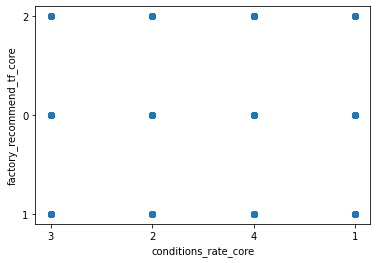

In [6]:
plt.scatter(df.conditions_rate_core, df.factory_recommend_tf_core)
plt.xlabel('conditions_rate_core')
plt.ylabel('factory_recommend_tf_core')
plt.show()

#we need a way to represent the amount of times thei happens at a node. 

In [7]:
X = df.conditions_rate_core.values.reshape(-1, 1)

In [8]:
#4522 samples with a single feature (column)
X.shape

(3620, 1)

In [9]:
y = df.factory_recommend_tf_core


In [10]:
model = LinearRegression()

In [11]:
model.fit(X, y)

LinearRegression()

In [12]:
y_pred = model.predict(X)
print(y_pred.shape)


(3620,)


TypeError: unhashable type: 'numpy.ndarray'

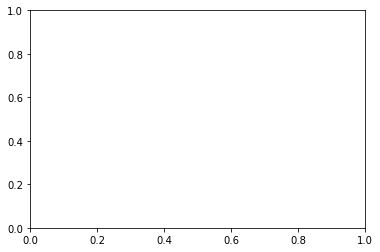

In [13]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [ ]:
print(model.coef_)
print(model.intercept_)